# ML Group Activity

### ML Application :- Mall Customer Segmentation Data Analysis

### Group Member Details :- 

|Sr.No.   	| Name      |  Roll No.| Registration No.|
|:-:    	|---	    |---	    |---	         |
| 1     	| Suraj Bokde 	| 72  	|   18010484	|
| 2  	    | Suyash Bidkar | 73   	|   18010482	|
| 3  	    | Gaurav Bagde 	|  48 	|   18010494	|  



 ### Importing Libraries  

In [125]:
import numpy as np                        # linear algebra
import pandas as pd                       # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt           # data visualization
import seaborn as sns                     # data visualization
from sklearn.cluster import KMeans        # Import Sklearn KMeans clustering 


### Loading Dataset 

In [126]:
df = pd.read_csv('D:\\3rd Year 6th sem\\ML Lab\\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Information Of Dataset

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Basic Stastical Analysis 

In [128]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Count :-** Shows he total number.  
**Mean :-** Shows the average.  
**Std :-** Standard deviation value  
**Min :-** Minimum value  
**%25 :-** First Quantile  
**%50 :-** Median or Second Quantile   
**%75 :-** Third Quantile  
**Max :-** Maximum value

### Datatypes in Dataset

In [129]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Columns/ Features of Dataset

In [130]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Shape of Dataset

In [131]:
df.shape

(200, 5)

So, Our dataset contains 200 rows and 5 Columns

### Count Null Values in Dataset

In [132]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

So there are no Null values in our dataset

### Customer Gender Visualization

#### Count the Each Gender in Dataset

In [133]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In our Dataset Total Female Customers are 112 and Male Customers are 88

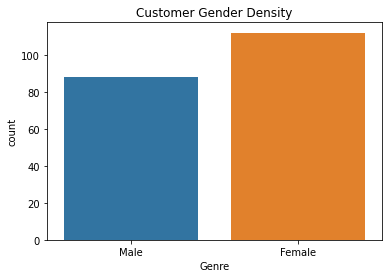

In [134]:
sns.countplot(x='Genre', data=df)
plt.title('Customer Gender Density')
plt.show()

From the above barplot, we observe that the number of females is higher than the males. Now, let us visualize a pie chart to observe the ratio of male and female distribution.

#### Create Piechart

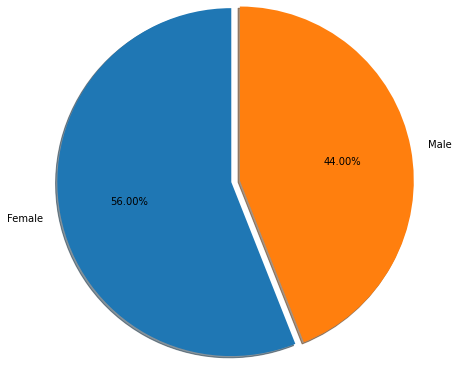

In [135]:
totalgenre = df.Genre.value_counts()
genrelabel = ['Female', 'Male']

plt.pie(totalgenre, labels=genrelabel, radius=2.0, autopct='%0.2f%%', shadow=True, explode=[0, 0.1], startangle=90)
# radius increase the size, autopct for show percentage two decimal point

plt.show() 

From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%

### Visualization of Age Distribution with Histogram

In [136]:
df['Age'].describe()       # summary of the Age variable.

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

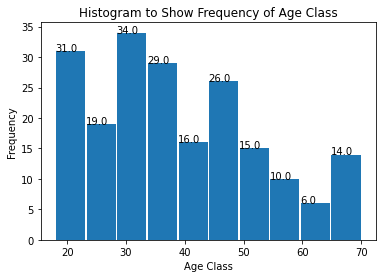

In [137]:
my_bins=10      # Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['Age'],bins=my_bins, rwidth=0.95) 

plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show Frequency of Age Class')

for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

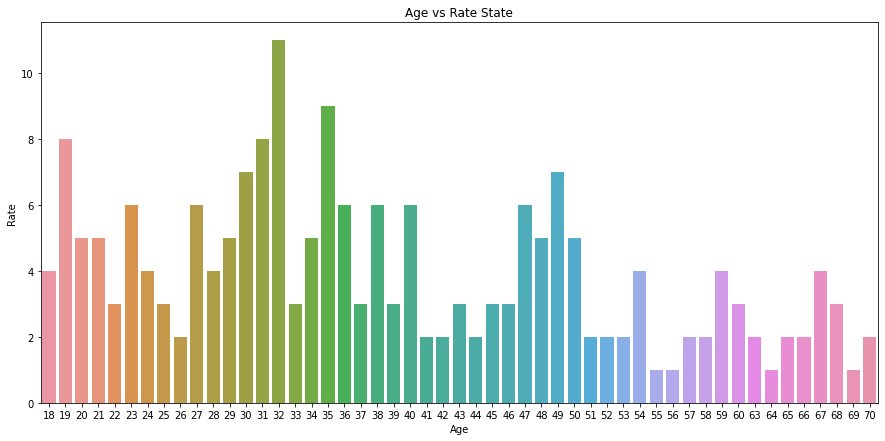

In [138]:
plt.figure(figsize=(15,7))
sns.barplot(x=df.Age.value_counts().index,y=df.Age.value_counts().values)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.title('Age vs Rate State')
plt.show()

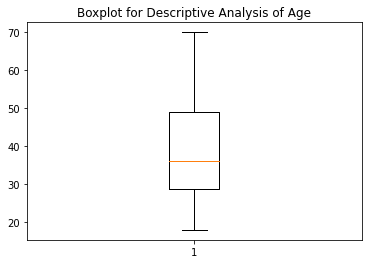

In [139]:
plt.boxplot(df["Age"])
plt.title('Boxplot for Descriptive Analysis of Age')
plt.show()

From the above three visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70

### Analysis of the Annual Income of the Customers

In [140]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

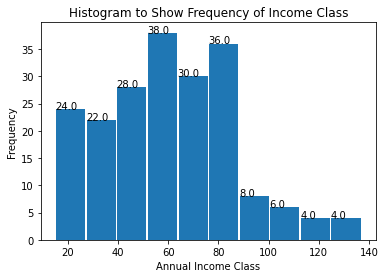

In [141]:
my_bins=10   # Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['Annual Income (k$)'],bins=my_bins, rwidth=0.95) 

plt.xlabel('Annual Income Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show Frequency of Income Class')

for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

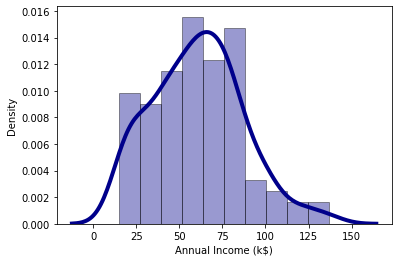

In [142]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Annual Income (k$)'], hist=True, kde=True, 
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137.   
People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56.

### Analyzing Spending Score of the Customers

In [143]:
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

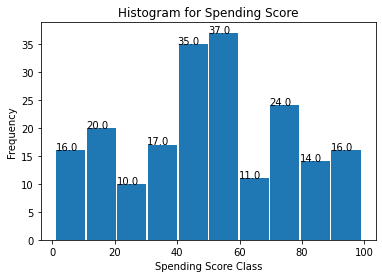

In [144]:
my_bins=10   # Histogram used by deafult 10 bins . bins like range.

arr=plt.hist(df['Spending Score (1-100)'],bins=my_bins, rwidth=0.95) 

plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')
plt.title('Histogram for Spending Score')

for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

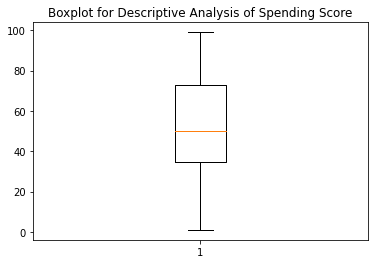

In [145]:
plt.boxplot(df["Spending Score (1-100)"])
plt.title('Boxplot for Descriptive Analysis of Spending Score')
plt.show()

We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20.  
From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

### K-Means Clustering Algorithm

#### Check elbow and SSE for different values of K

In [146]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])   #Annual Income and Spending score are most important features
    sse.append(km.inertia_)       #km_inertia_ is used for calculating SSE
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25022.485004530332,
 21797.08494464637]

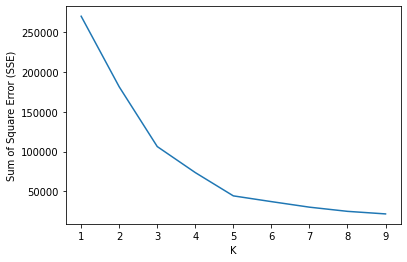

In [147]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error (SSE)')
plt.plot(k_rng, sse)

For this graph clearly the elbow is forming at **K=5**. So the
optimal value will be 3 for performing K-Means.

### K-means with K = 5

In [148]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [149]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


### Final Cluster Centers

In [154]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [155]:
df['cluster'].value_counts()

1    81
4    39
2    35
0    23
3    22
Name: cluster, dtype: int64

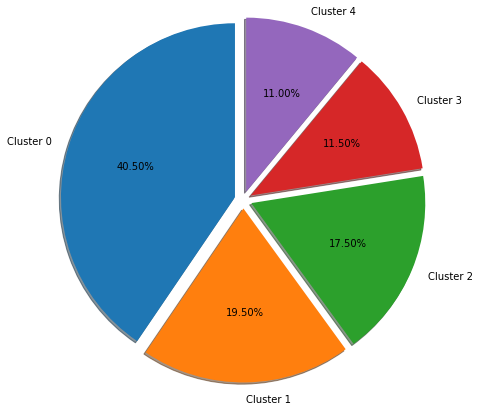

In [156]:
clustercounts = df.cluster.value_counts()
clusterlabel = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.pie(clustercounts, labels=clusterlabel, radius=2.0, autopct='%0.2f%%', shadow=True, explode=[0.1,0.1,0.1,0.1,0.1], startangle=90)

plt.show() 

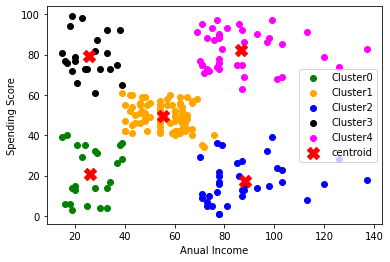

In [157]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]

plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='orange')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='blue')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='magenta')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='X', label='centroid', s=150)

plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'centroid'])

In the above diagram, Customer Segmentation is done and we have divided the Mall's customer into 5 clusters :-
1. Cluster 0 => Customer with income between (20k$ - 40k$) and Spending Score between (0-40)  
2. Cluster 1 => Customer with income between (40k$ - 70k$) and Spending Score between (40-60)  
3. Cluster 2 => Customer with income between (60k$ - 140k$) and Spending Score between (0-40)  
4. Cluster 3 => Customer with income between (20k$ - 40k$) and Spending Score between (60-100)  
5. Cluster 4 => Customer with income between (65k$ - 140k$) and Spending Score between (60-100)

### Conclusion: -
We have successfully made a Machine Learning Model which is able to Analyse the Customer's behaviour and categorize them into clusters and sucessfully completed this group activity.